# Customer Churn Prediction

 # Business problem

Customer churning is one of  the major problem come across big public service organizations,bank and many more relevant sectors.  Customer churn simply means a rate at which customers leaves the company.So here business problem is very straight forward we have to predict the customer who stays with the bank or either leaves.

# DATA

 we have downloaded the data from kaggle 

Data Source=https://www.kaggle.com/mathchi/churn-for-bank-customers

# Machine Learning problem

 By using the previous Data ,Bank wants to create a Machine Learning model which can Predict about a customer who will churn or not in future.


Data contains 10000 rows and 14 columns of which 1 column("Exited") is target variable which contains two categorical values "0" and "1".

# Performance Metric

As this is classification Problem,then we will use F1 scoring to check the performance of model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
import warnings
from sklearn.metrics import accuracy_score, log_loss
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.shape

(10000, 14)

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df['Exited'].describe()

count    10000.000000
mean         0.203700
std          0.402769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Exited, dtype: float64

In [8]:
display(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
dup=df[df.duplicated()]
dup.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


# Data Visualization


In [11]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Male      5457
Female    4543
Name: Gender, dtype: int64


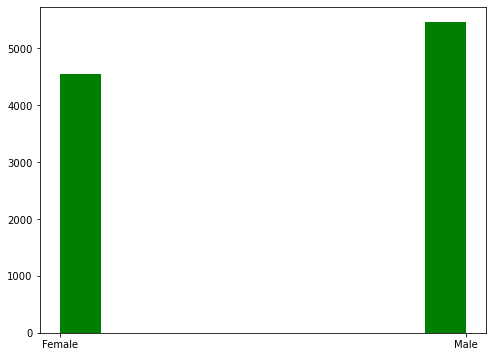

          Exited
Gender          
Female  0.250715
Male    0.164559


In [12]:
#feature1: gender
Gender_count=df['Gender'].value_counts()
print(Gender_count)
plt.figure(figsize=(8,6))
plt.hist(df['Gender'],facecolor='g')
plt.show()
print(df[['Gender','Exited']].groupby('Gender').mean())

hence mean values are different so we have to condiser the gender feature in the model.It it provide much information for creating model.


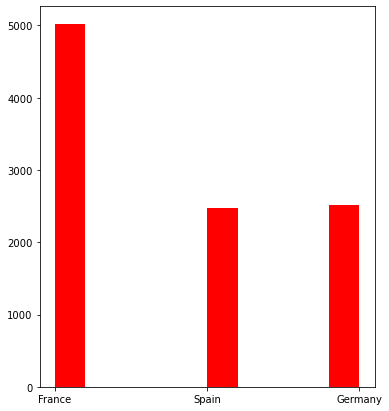

,Exited
Geography,
France,0.161548
Germany,0.324432
Spain,0.166734


In [13]:
df['Geography'].value_counts()
plt.figure(figsize=(6,7))
plt.hist(df['Geography'],facecolor='r')
plt.show()
df[['Geography','Exited']].groupby('Geography').mean()

people from germany tends to exit more than france and spain,,hence it will be good feature

In [14]:
#feature2 :Credit Score
print(df["CreditScore"].value_counts())

850    233
678     63
655     54
667     53
705     53
      ... 
412      1
351      1
365      1
373      1
423      1
Name: CreditScore, Length: 460, dtype: int64


as here valuescount is more so we will use pdf

650.5288
652.0
716.0
585.0
718.0


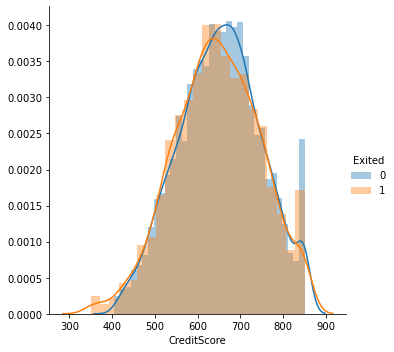

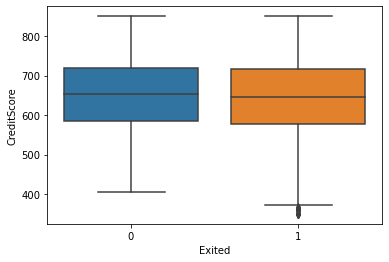

In [15]:
a=np.mean(df.CreditScore)
print(a)
b=np.median(df.CreditScore)
print(b)

sa=df.loc[df['Exited']==1]
sb=df.loc[df['Exited']==0]

c=np.percentile(sa['CreditScore'],75)
print(c)

d=np.percentile(sb['CreditScore'],25)
print(d)

e=np.percentile(sb['CreditScore'],75)
print(e)

sns.FacetGrid(df, hue="Exited", size=5) \
   .map(sns.distplot, "CreditScore",kde='True') \
   .add_legend()
plt.show()

#creating box plot
sns.boxplot(x='Exited',y='CreditScore', data=df)
plt.show()

from the above pdf graph,both 1 and 0 are highly over lapping on each other.

so this feature is not much important hence i am droping this feature.

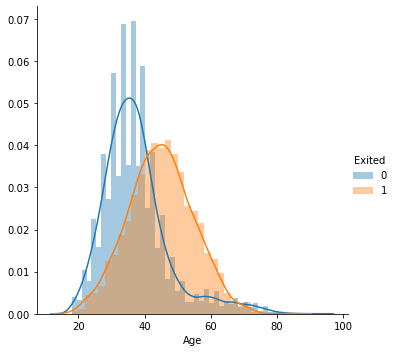

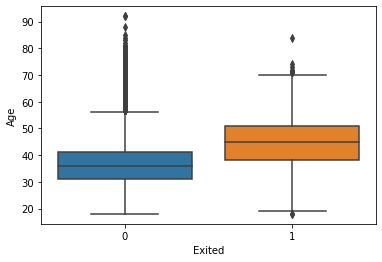

In [16]:
#feature3:Age
sns.FacetGrid(df, hue="Exited", size=5) \
   .map(sns.distplot, "Age",kde='True') \
   .add_legend()
plt.show()

sns.boxplot(y='Age',x='Exited',data=df)
plt.show()

slighty overlap but the younger customer tends to remain in company and older customer tends to exit the company.so i will keep this feature.

75% of people who not exits the company belong to age lower than 40

25% of  people who not exit the company belongs to age lower than 22

50 % of people who exit the company belongs to age between 40 to 54

this feature will help us 

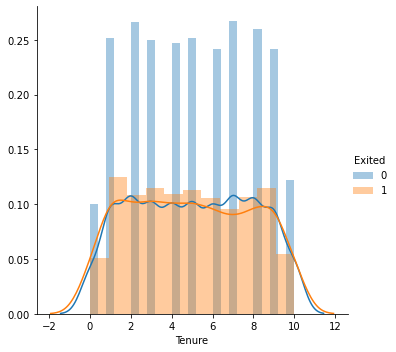

In [17]:
#feauture 4:Tenure
sns.FacetGrid(df, hue="Exited", size=5) \
   .map(sns.distplot, "Tenure",kde='True') \
   .add_legend()
plt.show()

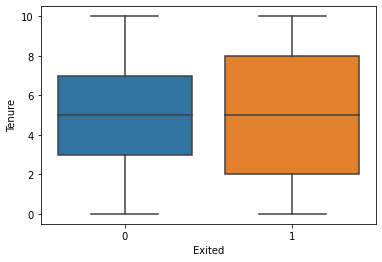

In [18]:
sns.boxplot(y='Tenure',x='Exited',data=df)
plt.show()

as seen from both graph it is slightly overlapping so i will keep this feature.

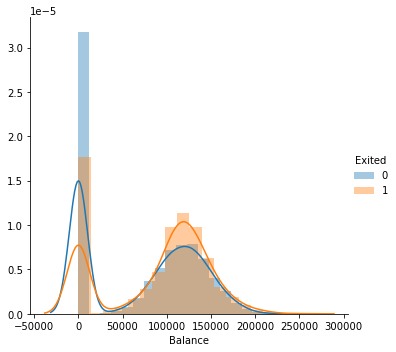

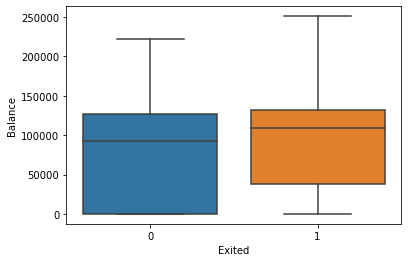

In [19]:
#feature5:Balance

sns.FacetGrid(df, hue="Exited", size=5) \
   .map(sns.distplot, "Balance",kde='True') \
   .add_legend()
plt.show()
sns.boxplot(x='Exited',y='Balance',data=df)
plt.show()


75% people who has has balance less than 130000 tend to stay the company

50 % of people who exit the company has the balance between 15000 to 40000

And mean values are different which means this feature is important,hence we will keep this feature.

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


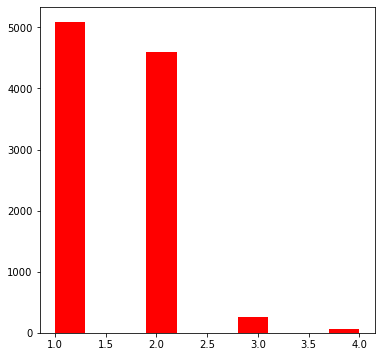

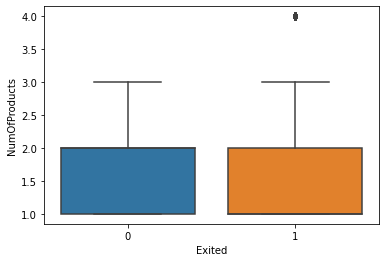

In [20]:
#feature6:Number of products
print(df['NumOfProducts'].value_counts())


plt.figure(figsize=(6,6))
plt.hist(df['NumOfProducts'],facecolor='r')
plt.show()

sns.boxplot(x='Exited',y='NumOfProducts',data=df)
plt.show()



their are 5000 people having 1 product
4600 people having 2 product

             Exited
HasCrCard          
0          0.208149
1          0.201843


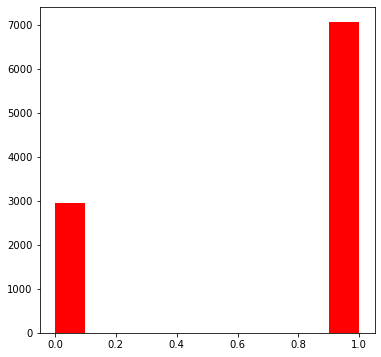

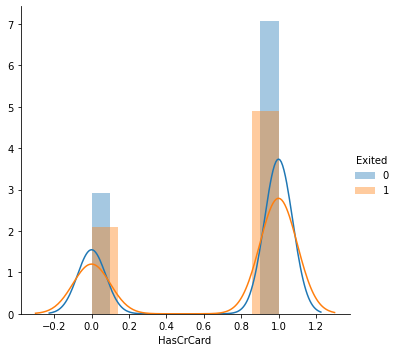

In [21]:
#featue7:Has credit card
print(df[['HasCrCard','Exited']].groupby('HasCrCard').mean())
plt.figure(figsize=(6,6))
plt.hist(df['HasCrCard'],facecolor='r')
plt.show()
sns.FacetGrid(df, hue="Exited", size=5) \
   .map(sns.distplot, "HasCrCard",kde='True') \
   .add_legend()
plt.show()

Here mean is equal but according to observation from pdf i will keep this feature

                  Exited
IsActiveMember          
0               0.268509
1               0.142691


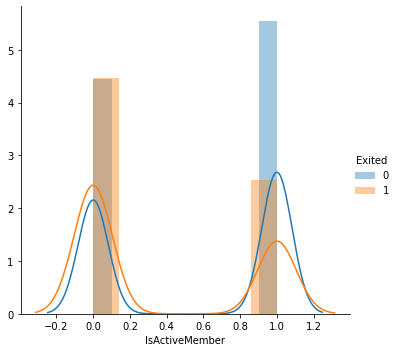

In [22]:
#feature7: is active member 
print(df[['IsActiveMember','Exited']].groupby("IsActiveMember").mean())


sns.FacetGrid(df, hue="Exited", size=5) \
   .map(sns.distplot, "IsActiveMember",kde='True') \
   .add_legend()
plt.show()

active members tends to exit the company is less than non active members and mean values are different so will keep this feature.

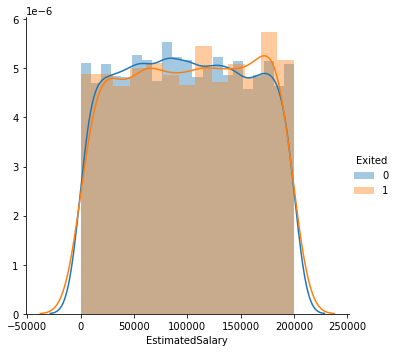

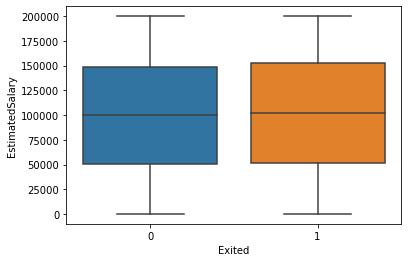

In [23]:
#feature8: Estimated salary

sns.FacetGrid(df, hue="Exited", size=5) \
   .map(sns.distplot, "EstimatedSalary",kde='True') \
   .add_legend()
plt.show()
sns.boxplot(x='Exited',y='EstimatedSalary',data=df)
plt.show()

the graph is highly overlapping so this feature will not provide us much information.

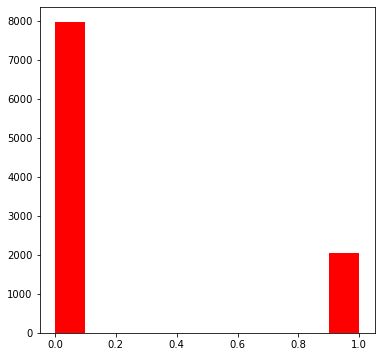

In [24]:
#observation on class label

plt.figure(figsize=(6,6))
plt.hist(df['Exited'],facecolor='r')
plt.show()

In [25]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

from the graph and values count,the number of '0' are 4x times of '1' so this is and imbalance data,before using this data we have to balance the data.


for balancing the data we use the method known as upsampling,in which it will create the duplicates of the smaller values.

before upsampling we have to remove the unwanted feature from the data, so to make the data more simple.

# DATA PREPROCESSING

In [26]:
data=df.drop(['RowNumber','CustomerId','Surname','CreditScore','EstimatedSalary'],axis=1)

In [27]:
data

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,France,Female,42,2,0.00,1,1,1,1
1,Spain,Female,41,1,83807.86,1,0,1,0
2,France,Female,42,8,159660.80,3,1,0,1
3,France,Female,39,1,0.00,2,0,0,0
4,Spain,Female,43,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...,...
9995,France,Male,39,5,0.00,2,1,0,0
9996,France,Male,35,10,57369.61,1,1,1,0
9997,France,Female,36,7,0.00,1,0,1,1
9998,Germany,Male,42,3,75075.31,2,1,0,1


In [28]:
data.shape

(10000, 9)

Their are features which is having categorical values ,so we have to convert them to numerical values as some algorithms works better on numerical values.

for this labeling is used.

In [29]:
#selecting the categorical feature for labeling
categorical=['HasCrCard','IsActiveMember','NumOfProducts','Gender','Geography']

In [30]:
X=pd.get_dummies(data,columns=categorical,drop_first=True)

In [31]:
X.head(25)

,Age,Tenure,Balance,Exited,HasCrCard_1,IsActiveMember_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Gender_Male,Geography_Germany,Geography_Spain
0,42,2,0.00,1,1,1,0,0,0,0,0,0
1,41,1,83807.86,0,0,1,0,0,0,0,0,1
2,42,8,159660.80,1,1,0,0,1,0,0,0,0
3,39,1,0.00,0,0,0,1,0,0,0,0,0
4,43,2,125510.82,0,1,1,0,0,0,0,0,1
5,44,8,113755.78,1,1,0,1,0,0,1,0,1
6,50,7,0.00,0,1,1,1,0,0,1,0,0
7,29,4,115046.74,1,1,0,0,0,1,0,1,0
8,44,4,142051.07,0,0,1,1,0,0,1,0,0
9,27,2,134603.88,0,1,1,0,0,0,1,0,0


In [32]:
X.shape

(10000, 12)

The Features like (age,tenure,balance) are having some numerical values which are much greater than other values,as we can see this from above balance colum that some rows is having 0 values and some are having 143129 ,so this values create problem so we have to scale them to standardize.

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaling = MinMaxScaler()
age = scaling.fit_transform(X[['Age']])
ten = scaling.fit_transform(X[['Tenure']])
bal=scaling.fit_transform(X[['Balance']])

X['Age'] = age
X['Tenure'] = ten
X['Balance']=bal


In [35]:
X.head(11)

,Age,Tenure,Balance,Exited,HasCrCard_1,IsActiveMember_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Gender_Male,Geography_Germany,Geography_Spain
0,0.324324,0.2,0.000000,1,1,1,0,0,0,0,0,0
1,0.310811,0.1,0.334031,0,0,1,0,0,0,0,0,1
2,0.324324,0.8,0.636357,1,1,0,0,1,0,0,0,0
3,0.283784,0.1,0.000000,0,0,0,1,0,0,0,0,0
4,0.337838,0.2,0.500246,0,1,1,0,0,0,0,0,1
5,0.351351,0.8,0.453394,1,1,0,1,0,0,1,0,1
6,0.432432,0.7,0.000000,0,1,1,1,0,0,1,0,0
7,0.148649,0.4,0.458540,1,1,0,0,0,1,0,1,0
8,0.351351,0.4,0.566170,0,0,1,1,0,0,1,0,0
9,0.121622,0.2,0.536488,0,1,1,0,0,0,1,0,0


In [36]:
X['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

As we discussed that the Data is imbalanced ,so here we will balance the Data

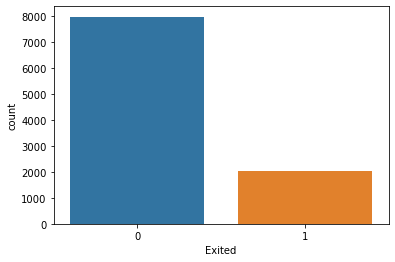

In [37]:
#lets check whether data is balanced or imbalanced
import seaborn as sns
sns.countplot('Exited', data=X)
plt.show()
#to be exact, lets find out the number

In [38]:
#highly imbalance data we can observe

In [39]:
# so we have to balance the  data ,for that we need to do upsampling

In [40]:
#upsampling of data

no_churn=X[X['Exited']==0]
yes_churn=X[X['Exited']==1]
upsampled = yes_churn.sample(n=len(no_churn), replace=True)
X1 = no_churn.append(upsampled).reset_index(drop=True)
print(upsampled.shape)
print(X1.shape)

X1.head()

(7963, 12)
(15926, 12)


,Age,Tenure,Balance,Exited,HasCrCard_1,IsActiveMember_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Gender_Male,Geography_Germany,Geography_Spain
0,0.310811,0.1,0.334031,0,0,1,0,0,0,0,0,1
1,0.283784,0.1,0.000000,0,0,0,1,0,0,0,0,0
2,0.337838,0.2,0.500246,0,1,1,0,0,0,0,0,1
3,0.432432,0.7,0.000000,0,1,1,1,0,0,1,0,0
4,0.351351,0.4,0.566170,0,0,1,1,0,0,1,0,0


0    7963
1    7963
Name: Exited, dtype: int64


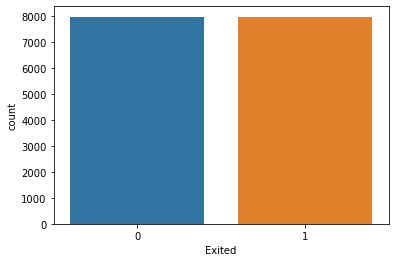

In [41]:
print(X1['Exited'].value_counts())
sns.countplot('Exited', data=X1)
plt.show()


Now here the number of class labels are now equal hence our data is balanced

In [42]:
X1.shape

(15926, 12)

In [43]:
x2=X1.drop('Exited',axis=1)

y2=X1['Exited']

In [44]:
x2.head(10)

,Age,Tenure,Balance,HasCrCard_1,IsActiveMember_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Gender_Male,Geography_Germany,Geography_Spain
0,0.310811,0.1,0.334031,0,1,0,0,0,0,0,1
1,0.283784,0.1,0.000000,0,0,1,0,0,0,0,0
2,0.337838,0.2,0.500246,1,1,0,0,0,0,0,1
3,0.432432,0.7,0.000000,1,1,1,0,0,1,0,0
4,0.351351,0.4,0.566170,0,1,1,0,0,1,0,0
5,0.121622,0.2,0.536488,1,1,0,0,0,1,0,0
6,0.175676,0.6,0.406606,0,0,1,0,0,1,0,0
7,0.081081,0.3,0.000000,1,0,1,0,0,1,0,1
8,0.216216,1.0,0.000000,1,0,1,0,0,0,0,0
9,0.094595,0.5,0.000000,0,0,1,0,0,0,0,0


In [45]:
y2

0        0
1        0
2        0
3        0
4        0
        ..
15921    1
15922    1
15923    1
15924    1
15925    1
Name: Exited, Length: 15926, dtype: int64

In [46]:
# data becomes balance now

# MODEL BUILDING

In [47]:
import warnings
warnings.filterwarnings("ignore")


# KNN algorithm

In [48]:
# knn(k nearest neighbour)
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier

tuned_parameters=[{'n_neighbors':[3,4,5,6]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state=50)
clf= KNeighborsClassifier()
modelknn=GridSearchCV( clf,tuned_parameters,scoring='f1_weighted')

modelknn.fit(X_train,y_train)

print(modelknn.best_estimator_)

# Fit the classifier to the data

KNeighborsClassifier(n_neighbors=3)


In [49]:
#predict the y on testing data
y_test_predicted=modelknn.predict(X_test)


In [50]:
#predict the y on training data
y_train_predicted=modelknn.predict(X_train)


In [51]:
#evaluation finding the accuracy
from sklearn.metrics import f1_score
X_knntest_F1score=f1_score(y_test,y_test_predicted,average='weighted')
print("Testing f1 score is",X_knntest_F1score) #f1 score on test data

X_knntrain_F1score=f1_score(y_train,y_train_predicted,average='weighted')
print("Training f1 score is",X_knntrain_F1score) #f1 score on train data

Testing f1 score is 0.8513449675251143
Training f1 score is 0.9236340093407783


good model as we are getting the f1 score 85% for testing data and 92% for training data

# Logistic regression

In [52]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

tunned_parameters=[{'C':[10**-4,10**-2,10**0,10**2,10**4]}]
X_train,X_test,y_train,y_test=train_test_split(x2,y2,test_size=0.3,random_state=50)
Lrmodel=GridSearchCV(LogisticRegression(max_iter=400),tunned_parameters,scoring='f1_weighted')

Lrmodel.fit(X_train,y_train)
print(Lrmodel.best_estimator_)

LogisticRegression(C=1, max_iter=400)


In [69]:
from sklearn.metrics import f1_score
y_testpredict=Lrmodel.predict(X_test)
y_trainpredict=Lrmodel.predict(X_train)
testing_F1=f1_score(y_test,y_testpredict,average='weighted')
traing_F1=f1_score(y_train,y_trainpredict)
print("Training F1 score",testing_F1)
print("Training F1 score",traing_F1)

Training F1 score 0.7570121213687613
Training F1 score 0.7478733031674207


seems good and the difference between the f1 score is so close.

# Decision Tree


In [55]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(criterion='entropy',random_state=0)

DTC.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [56]:
#predicting the test result
ytest_predict=DTC.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix,f1_score
#create the confusion matrix 
cm=confusion_matrix(y_test,ytest_predict)
print(cm)

[[2049  380]
 [  62 2287]]


In [72]:
#calculate the f1 score
test_f1score=f1_score(y_test,ytest_predict,average='weighted')
print("Testing F1 score",test_f1score)
ytrain_predict=DTC.predict(X_train)
train_f1score=f1_score(y_train,ytrain_predict,average='weighted')
print("Training F1 score",train_f1score)

Testing F1 score 0.4857035899060892
Training F1 score 0.9681384122284241


# RANDOM FOREST

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn import tree
clf1 = RandomForestClassifier()
tuned_parameters1=[{'n_estimators':[100,200,300]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state=42)

model=GridSearchCV(clf1,tuned_parameters1,scoring='f1')

model.fit(X_train,y_train)

print(model.best_estimator_)
print("Testing Score",model.score(X_test,y_test))
print("Training Score",model.score(X_train,y_train))

RandomForestClassifier(n_estimators=300)
Testing Score 0.9302232053086669
Training Score 0.9954500847533231


# SVM

In [61]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [62]:
y_predict=classifier.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix,f1_score
#create the confusion matrix 
cm=confusion_matrix(y_test,y_predict)
print(cm)

[[1830  568]
 [ 598 1782]]


In [75]:
from sklearn.metrics import f1_score
testf1=f1_score(y_test,y_predict,average='weighted')
print("Testing F1 score",testf1)
y_train_predict=classifier.predict(X_train)
trainf1=f1_score(y_train,y_train_predict,average='weighted')
print("Training F1 score",trainf1)

Testing F1 score 0.7559494443145454
Training F1 score 0.7515456393404899


# Preetty Table 

In [76]:
pip install https://pypi.python.org/packages/source/P/PrettyTable/prettytable-0.7.2.tar.bz2

  Using cached https://pypi.python.org/packages/source/P/PrettyTable/prettytable-0.7.2.tar.bz2 (21 kB)
Note: you may need to restart the kernel to use updated packages.


In [79]:
# lets use pretty table library to conclude things in a better way
import prettytable
from prettytable import PrettyTable
columns=(["ALGORITHM", "F1_SCORE_WEIGHTED"])
myTable = PrettyTable()
myTable.add_column(columns[0], ["KNN","Logestic Regression","Decision Tree","Random Forest","SVM"])
myTable.add_column(columns[1], ['85%','75%','89%','93%','75%'])

print(myTable)

+---------------------+-------------------+
|      ALGORITHM      | F1_SCORE_WEIGHTED |
+---------------------+-------------------+
|         KNN         |        85%        |
| Logestic Regression |        75%        |
|    Decision Tree    |        89%        |
|    Random Forest    |        93%        |
|         SVM         |        75%        |
+---------------------+-------------------+


 As the observation from f1 scoring of various Algorithms ,it is observed that random forest is giving the higher accuracy as Random Forest Overcome the problem of overfitting.